Step 1: Install awscli

Installing the AWS CLI for accessing and listing contents in the S3 bucket.

In [2]:
!pip install awscli

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 87.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 548.2/548.2 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: rsa
    Found existing installation: rsa 4.9
    Uninstalling rsa-4.9:
      Successfully uninstalled rsa-4.9
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.16
    Uninstalling botocore-1.35.16:
      Successfully uninstalled botocore-1.35.16
  Attempting uninstall: s3transfer
    Found existing installation: s3transfer 0.6.2
    Uninstalling s3transfer-0.6.2:
      Successfully uninstalled s3transfer-0.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
aiobotocore 2.15.0 re

Step 2: Set Up Dummy AWS Credentials

Configuring AWS CLI with dummy access keys to prevent permission errors.

In [3]:
!aws configure set aws_access_key_id dummyAccessKeyId
!aws configure set aws_secret_access_key dummySecretAccessKey
!aws configure set default.region us-west-2

Step 3: List the S3 Bucket Contents

Listing files in the main BodyM dataset bucket.

In [4]:
# List all files in the BodyM dataset bucket
!aws s3 ls --no-sign-request s3://amazon-bodym/

                           PRE testA/
                           PRE testB/
                           PRE train/


Step 4: List Files in the Training Folder

Listing files in the train/ directory to verify the structure and contents.

In [5]:
!aws s3 ls --no-sign-request s3://amazon-bodym/train/

                           PRE mask/
                           PRE mask_left/
2022-09-27 05:43:52     121493 hwg_metadata.csv
2022-09-27 05:43:53     603486 measurements.csv
2022-09-27 05:43:51     461299 subject_to_photo_map.csv


Step 5: Install s3fs for Direct S3 Access in Python

Installing the s3fs library to directly access files from S3 in the code.

In [7]:
!pip install s3fs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 76.5 MB/s eta 0:00:00:00:01:01
  Attempting uninstall: botocore
    Found existing installation: botocore 1.35.29
    Uninstalling botocore-1.35.29:
      Successfully uninstalled botocore-1.35.29
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
awscli 1.34.29 requires botocore==1.35.29, but you have botocore 1.35.16 which is incompatible.
boto3 1.26.100 requires botocore<1.30.0,>=1.29.100, but you have botocore 1.35.16 which is incompatible.
boto3 1.26.100 requires s3transfer<0.7.0,>=0.6.0, but you have s3transfer 0.10.2 which is incompatible.


Step 6: Load CSV Files from S3 into DataFrames

Load measurements.csv and subject_to_photo_map.csv directly from S3 into pandas DataFrames.

In [37]:
import pandas as pd
import s3fs

# Initialize S3 filesystem
s3 = s3fs.S3FileSystem(anon=True)

# Load CSV files
measurements_df = pd.read_csv('s3://amazon-bodym/train/measurements.csv', storage_options={"anon": True})
subject_photo_map = pd.read_csv('s3://amazon-bodym/train/subject_to_photo_map.csv', storage_options={"anon": True})

# Merge the measurement and photo map to get the complete dataset
full_data = pd.merge(measurements_df, subject_photo_map, on='subject_id')
full_data['image_path'] = 's3://amazon-bodym/train/mask/' + full_data['photo_id'] + '.png'
full_data.head()

,subject_id,ankle,arm-length,bicep,calf,chest,forearm,height,hip,leg-length,shoulder-breadth,shoulder-to-crotch,thigh,waist,wrist,photo_id,image_path
0,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,e6f404ebda41ebe93573d3e219c88297,s3://amazon-bodym/train/mask/e6f404ebda41ebe93573d3e219c88297.png
1,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,39a4241cb892618a694747e224d57b9e,s3://amazon-bodym/train/mask/39a4241cb892618a694747e224d57b9e.png
2,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,a00a6c0c074efbd92c894cbc77023939,s3://amazon-bodym/train/mask/a00a6c0c074efbd92c894cbc77023939.png
3,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,7c99b3017f21f9797851e70de084bfcb,s3://amazon-bodym/train/mask/7c99b3017f21f9797851e70de084bfcb.png
4,-494U-YoXOD8e8gkCuyaRLn4MLo5P8Dm2B1s59WBGdg,24.343954,52.902378,33.294395,38.709511,102.526024,27.599094,177.610992,108.047134,81.736435,35.915691,67.891273,57.872795,92.286171,16.709131,3000cb26b2090db5a7d82926af8c6a83,s3://amazon-bodym/train/mask/3000cb26b2090db5a7d82926af8c6a83.png


Step 7: Set Up the FastAI DataBlock

Creating a custom DataBlock to handle image loading directly from S3.

In [39]:
from fastai.vision.all import *

# Custom function to open images directly from S3
def open_image_from_s3(img_path):
    with s3.open(img_path, 'rb') as f:
        img = PILImage.create(f)
    return img

# Set up DataBlock for image and regression tasks
body_measurement_block = DataBlock(
    blocks=(ImageBlock, RegressionBlock),  # Define input as images and output as continuous measurements
    get_x=lambda x: open_image_from_s3(x['image_path']),  # Use custom loader to fetch images from S3
    get_y=ColReader(list(range(1, 15))),  # Extract 14 measurement columns
    splitter=RandomSplitter(valid_pct=0.2),
    item_tfms=Resize(128)  # Resize images to 128x128
)

Step 8: Create DataLoaders and Visualize a Batch

Creating DataLoaders to handle batches and visualizing sample images.

/opt/conda/lib/python3.10/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)


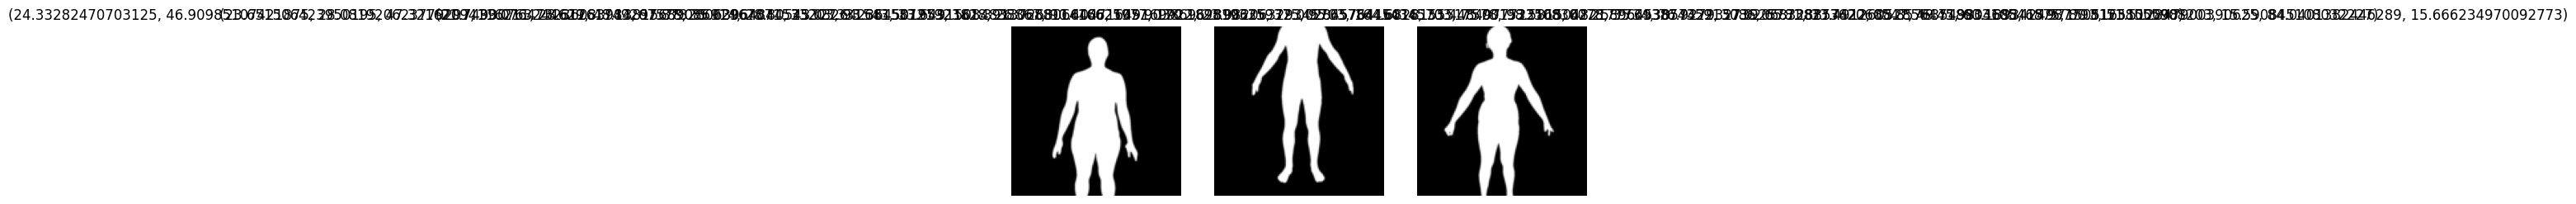

In [40]:
dls = body_measurement_block.dataloaders(full_data, bs=32)
dls.show_batch(nrows=1, ncols=3)

Step 9: Update DataLoaders and Train the Model


In [43]:
dls = body_measurement_block.dataloaders(full_data, bs=16, num_workers=0)
item_tfms=Resize(64)
learn = vision_learner(dls, squeezenet1_0, loss_func=MSELossFlat())
learn.fine_tune(3)

/opt/conda/lib/python3.10/site-packages/fastai/data/transforms.py:214: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  o = r[c] if isinstance(c, int) or not c in getattr(r, '_fields', []) else getattr(r, c)
/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth
100%|██████████| 4.78M/4.78M [00:00<00:00, 51.0MB/s]


epoch,train_loss,valid_loss,time
0,3558.382080,2426.934082,08:49


epoch,train_loss,valid_loss,time
0,570.327209,312.816986,08:50
1,84.834488,36.162346,08:48
2,63.240196,1121.473145,09:02


Step 10: Plot Training Loss

Plotting the training and validation loss to observe convergence.

<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

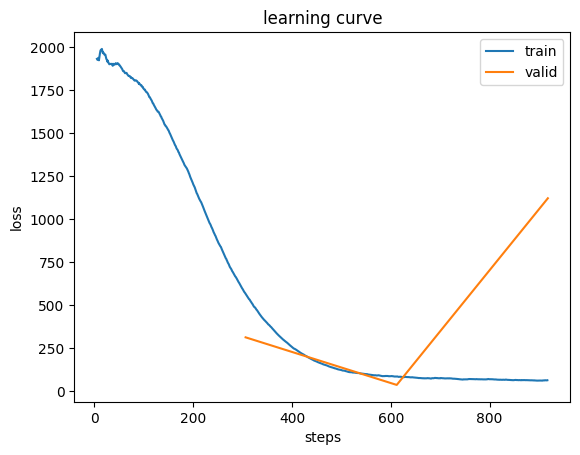

In [44]:
learn.recorder.plot_loss()

Step 11: Calculate RMSE

Calculate and print the Root Mean Squared Error (RMSE) on the validation set.

In [45]:
from sklearn.metrics import mean_squared_error

# Get predictions and calculate RMSE on the validation set
preds, targs = learn.get_preds()
rmse = mean_squared_error(targs, preds, squared=False)
print(f'Root Mean Squared Error: {rmse:.2f}')


Root Mean Squared Error: 28.20


Step 12: Scatter Plot of Predicted vs. Actual Measurements

Visualizing model performance by comparing predictions to actual values.

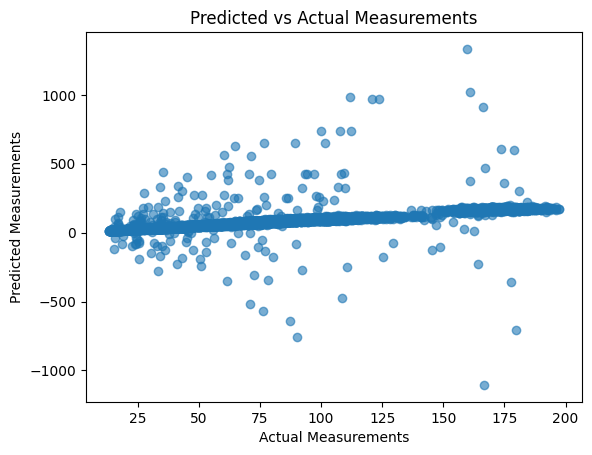

In [47]:
import matplotlib.pyplot as plt

# Scatter plot of predictions vs. targets
plt.scatter(targs, preds, alpha=0.6)
plt.xlabel('Actual Measurements')
plt.ylabel('Predicted Measurements')
plt.title('Predicted vs Actual Measurements')
plt.show()

Step 13: Plot Distribution of Absolute Errors

Plotting a histogram to understand error distribution.

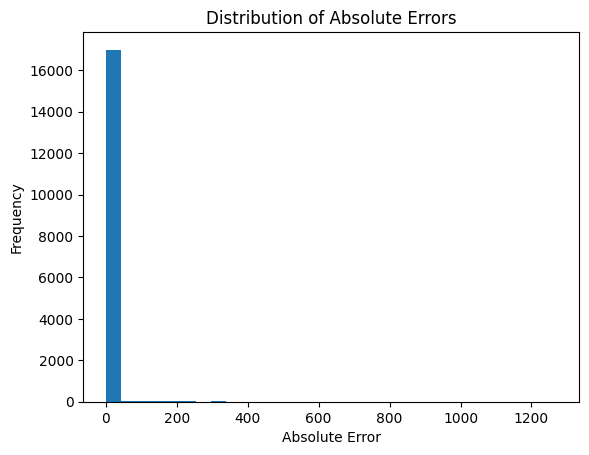

In [54]:
import matplotlib.pyplot as plt

errors = (preds - targs).abs()
plt.hist(errors.numpy().flatten(), bins=30)
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")
plt.title("Distribution of Absolute Errors")
plt.show()

Step 14: Save the Model Weights

Save the trained model weights for future use.

In [52]:
learn.model.eval()
torch.save(learn.model.state_dict(), '/kaggle/working/body_measurements_model_weights.pth')

<Axes: title={'center': 'Test Image'}>

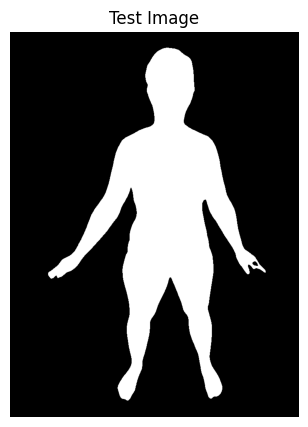

In [58]:
# Load the test image from S3 using the custom loader
test_image_path = 's3://amazon-bodym/train/mask/001f3a88501980a5eca6f6346a0ca8d9.png'
img = open_image_from_s3(test_image_path)

# Display the image using FastAI's `show` method
img.show(title="Test Image")


In [60]:
!aws s3 cp --no-sign-request s3://amazon-bodym/train/mask/001f3a88501980a5eca6f6346a0ca8d9.png /kaggle/working/test_image.png

download: s3://amazon-bodym/train/mask/001f3a88501980a5eca6f6346a0ca8d9.png to ./test_image.png


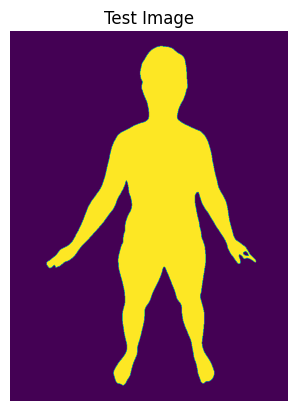

In [61]:
from PIL import Image
import matplotlib.pyplot as plt

# Load the downloaded image from the working directory
img = Image.open('/kaggle/working/test_image.png')

# Display the image
plt.imshow(img)
plt.axis('off')
plt.title("Test Image")
plt.show()


In [65]:
def predict_local_image(img_path):
    # Load and preprocess the local image
    img = PILImage.create(img_path)
    img = dls.train.after_item(img)

    # Move image tensor to GPU before applying `after_batch`
    img = img.unsqueeze(0).to('cuda')  # Add batch dimension and move to GPU

    # Now apply the `after_batch` transformation while on GPU
    img = dls.train.after_batch(img)

    # Move the model to GPU and set to evaluation mode
    model.to('cuda')
    model.eval()

    # Make predictions
    with torch.no_grad():
        preds = model(img)

    # Define measurement names
    measurement_names = [
        "ankle", "arm-length", "bicep", "calf", "chest", "forearm",
        "height", "hip", "leg-length", "shoulder-breadth",
        "shoulder-to-crotch", "thigh", "waist", "wrist"
    ]

    # Format the predictions
    return {name: round(pred.item(), 2) for name, pred in zip(measurement_names, preds[0])}

# Run the model on the local image
predicted_measurements = predict_local_image('/kaggle/working/test_image.png')
print(predicted_measurements)


{'ankle': -0.01, 'arm-length': 0.08, 'bicep': -0.07, 'calf': -0.06, 'chest': 0.05, 'forearm': -0.14, 'height': -0.06, 'hip': -0.02, 'leg-length': -0.0, 'shoulder-breadth': 0.1, 'shoulder-to-crotch': -0.0, 'thigh': -0.03, 'waist': -0.08, 'wrist': 0.08}


In [66]:
# Extract photo_id from the file name
photo_id = '001f3a88501980a5eca6f6346a0ca8d9'


In [67]:
# Filter for the actual data for this specific image
actual_data = full_data[full_data['photo_id'] == photo_id]
print(actual_data)


                                       subject_id      ankle  arm-length  \
1587  9qVCJoXCAJwZaC9u5-kXG26GlA3JmoMw92Rp5oiVEg4  21.848372   43.789162   

          bicep      calf      chest    forearm     height        hip  \
1587  28.690954  35.68446  94.800056  24.202276  154.63208  98.161041   

      leg-length  shoulder-breadth  shoulder-to-crotch      thigh      waist  \
1587   68.420532           30.9624           57.716381  52.366783  85.134323   

         wrist                          photo_id  \
1587  15.26209  001f3a88501980a5eca6f6346a0ca8d9   

                                                             image_path  
1587  s3://amazon-bodym/train/mask/001f3a88501980a5eca6f6346a0ca8d9.png  
